In [1]:
import zipfile

In [3]:
# ! wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2022-03-22 10:37:11--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.144, 172.253.115.128, 172.217.15.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   814KB/s    in 2m 27s  

2022-03-22 10:39:40 (726 KB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [4]:
# zip_ref = zipfile.ZipFile("pizza_steak.zip")
# zip_ref.extractall()
# zip_ref.close()

In [6]:
import os

for dirpath, dirnames, filenames in os.walk('./datasets/pizza_steak'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in './datasets/pizza_steak'.
There are 2 directories and 0 images in './datasets/pizza_steak/test'.
There are 0 directories and 250 images in './datasets/pizza_steak/test/steak'.
There are 0 directories and 250 images in './datasets/pizza_steak/test/pizza'.
There are 2 directories and 0 images in './datasets/pizza_steak/train'.
There are 0 directories and 750 images in './datasets/pizza_steak/train/steak'.
There are 0 directories and 750 images in './datasets/pizza_steak/train/pizza'.


In [1]:
import pathlib
import numpy as np

data_dir = pathlib.Path('./datasets/pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  
  target_folder = target_dir + '/' + target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

Image shape: (512, 512, 3)


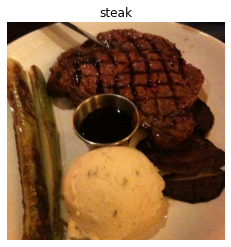

In [15]:
img = view_random_image(target_dir='./datasets/pizza_steak/train', target_class='steak')

In [16]:
import tensorflow as tf

tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 25,  15,  13],
        [ 20,  10,   8],
        [ 15,   5,   3],
        ...,
        [  8,   7,   3],
        [  7,   6,   2],
        [ 14,  13,   9]],

       [[ 21,  12,   7],
        [ 18,   9,   4],
        [ 15,   6,   1],
        ...,
        [ 13,  12,   8],
        [  7,   6,   2],
        [ 10,   9,   5]],

       [[ 18,   9,   4],
        [ 19,  10,   5],
        [ 17,   8,   3],
        ...,
        [ 16,  15,  11],
        [  8,   7,   3],
        [ 10,   9,   5]],

       ...,

       [[215, 155, 103],
        [214, 154, 102],
        [209, 149,  95],
        ...,
        [204, 133,  87],
        [207, 136,  92],
        [204, 133,  89]],

       [[203, 143,  93],
        [213, 153, 103],
        [207, 147,  95],
        ...,
        [210, 139,  93],
        [217, 146, 100],
        [205, 134,  88]],

       [[213, 152, 105],
        [207, 147,  97],
        [207, 147,  97],
        ...,
        [208, 137,  9

In [17]:
img.shape

(512, 512, 3)

In [18]:
img/255

array([[[0.09803922, 0.05882353, 0.05098039],
        [0.07843137, 0.03921569, 0.03137255],
        [0.05882353, 0.01960784, 0.01176471],
        ...,
        [0.03137255, 0.02745098, 0.01176471],
        [0.02745098, 0.02352941, 0.00784314],
        [0.05490196, 0.05098039, 0.03529412]],

       [[0.08235294, 0.04705882, 0.02745098],
        [0.07058824, 0.03529412, 0.01568627],
        [0.05882353, 0.02352941, 0.00392157],
        ...,
        [0.05098039, 0.04705882, 0.03137255],
        [0.02745098, 0.02352941, 0.00784314],
        [0.03921569, 0.03529412, 0.01960784]],

       [[0.07058824, 0.03529412, 0.01568627],
        [0.0745098 , 0.03921569, 0.01960784],
        [0.06666667, 0.03137255, 0.01176471],
        ...,
        [0.0627451 , 0.05882353, 0.04313725],
        [0.03137255, 0.02745098, 0.01176471],
        [0.03921569, 0.03529412, 0.01960784]],

       ...,

       [[0.84313725, 0.60784314, 0.40392157],
        [0.83921569, 0.60392157, 0.4       ],
        [0.81960784, 0

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
tf.random.set_seed(42)

train_data_gen = ImageDataGenerator(rescale=1./255)
valid_data_gen = ImageDataGenerator(rescale=1./255)

train_dir = './datasets/pizza_steak/train'
test_dir = './datasets/pizza_steak/test'

In [4]:
train_data = train_data_gen.flow_from_directory(directory=train_dir,
                                                batch_size=32,
                                                target_size=(224,224),
                                                class_mode='binary',
                                                seed=42)

valid_data = valid_data_gen.flow_from_directory(directory=test_dir,
                                                batch_size=32,
                                                target_size=(224,224),
                                                class_mode='binary',
                                                seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [4]:
model_1 = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size = 3,
                           activation = 'relu',
                           input_shape = (224, 224, 3)),
    
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    
    tf.keras.layers.MaxPool2D(2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 30s 631ms/step - loss: 0.5633 - accuracy: 0.6967 - val_loss: 0.4601 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 31s 661ms/step - loss: 0.4252 - accuracy: 0.7973 - val_loss: 0.3461 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 33s 700ms/step - loss: 0.3878 - accuracy: 0.8280 - val_loss: 0.3092 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 33s 703ms/step - loss: 0.3333 - accuracy: 0.8547 - val_loss: 0.2954 - val_accuracy: 0.8800
Epoch 5/5
47/47 [==============================] - 32s 686ms/step - loss: 0.3043 - accuracy: 0.8787 - val_loss: 0.2936 - val_accuracy: 0.8780


In [5]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [31]:
print(tf.__version__)

2.6.0


In [12]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu') 
])

model_2.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 160ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 160ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 7s 151ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 7s 154ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 7s 148ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000


In [8]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 228ms/step - loss: 2.6201 - accuracy: 0.6213 - val_loss: 1.0829 - val_accuracy: 0.6820
Epoch 2/5
47/47 [==============================] - 10s 203ms/step - loss: 0.6679 - accuracy: 0.7380 - val_loss: 0.5432 - val_accuracy: 0.7420
Epoch 3/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6639 - accuracy: 0.7260 - val_loss: 0.6981 - val_accuracy: 0.6980
Epoch 4/5
47/47 [==============================] - 9s 202ms/step - loss: 0.7890 - accuracy: 0.7007 - val_loss: 0.5013 - val_accuracy: 0.7720
Epoch 5/5
47/47 [==============================] - 9s 202ms/step - loss: 0.4898 - accuracy: 0.7847 - val_loss: 0.4198 - val_accuracy: 0.7980


In [9]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 150528)            0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               15052900  
_________________________________________________________________
dense_17 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_18 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


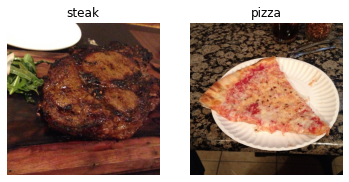

In [4]:
# Visualize the data

plt.figure()
plt.subplot(1, 2, 1)
steak_image = view_random_image('datasets/pizza_steak/train', 'steak')
plt.subplot(1, 2, 2)
pizza_image = view_random_image('datasets/pizza_steak/train', 'pizza')

In [5]:
## Define directory for data

train_dir = './datasets/pizza_steak/train'
test_dir = './datasets/pizza_steak/test'

In [6]:
# create train and test data generators and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory= train_dir,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               batch_size = 32)

test_data = train_datagen.flow_from_directory(directory= test_dir,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [7]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [8]:
# how many batches are there?

len(train_data)

47

In [28]:
images[:2], images[1].shape

(array([[[[0.10196079, 0.12156864, 0.20784315],
          [0.07058824, 0.08235294, 0.15686275],
          [0.05882353, 0.06666667, 0.11764707],
          ...,
          [0.08627451, 0.10980393, 0.24313727],
          [0.09019608, 0.1137255 , 0.24705884],
          [0.08235294, 0.10588236, 0.2392157 ]],
 
         [[0.09803922, 0.1254902 , 0.20000002],
          [0.10196079, 0.1137255 , 0.18823531],
          [0.07450981, 0.08235294, 0.14117648],
          ...,
          [0.07843138, 0.10196079, 0.23529413],
          [0.08235294, 0.10588236, 0.2392157 ],
          [0.09019608, 0.1137255 , 0.24705884]],
 
         [[0.07843138, 0.10588236, 0.18039216],
          [0.09411766, 0.1137255 , 0.18823531],
          [0.09019608, 0.09803922, 0.15686275],
          ...,
          [0.08235294, 0.10588236, 0.23137257],
          [0.08235294, 0.10588236, 0.23137257],
          [0.07843138, 0.10196079, 0.227451  ]],
 
         ...,
 
         [[0.13725491, 0.1254902 , 0.16862746],
          [0.12549

In [10]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [17]:
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape = (224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [18]:
model_4.compile(loss = 'binary_crossentropy',
                optimizer= Adam(),
                metrics= ['accuracy'])

In [19]:
history_4 = model_4.fit(train_data,
            epochs= 5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 39s 829ms/step - loss: 1.3739 - accuracy: 0.6580 - val_loss: 0.5237 - val_accuracy: 0.7420
Epoch 2/5
47/47 [==============================] - 37s 796ms/step - loss: 0.4909 - accuracy: 0.7707 - val_loss: 0.4833 - val_accuracy: 0.7620
Epoch 3/5
47/47 [==============================] - 36s 767ms/step - loss: 0.4214 - accuracy: 0.8220 - val_loss: 0.3897 - val_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 39s 839ms/step - loss: 0.3401 - accuracy: 0.8553 - val_loss: 0.3920 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 44s 923ms/step - loss: 0.2325 - accuracy: 0.9193 - val_loss: 0.4002 - val_accuracy: 0.8000


In [14]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten (Flatten)            (None, 475240)            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

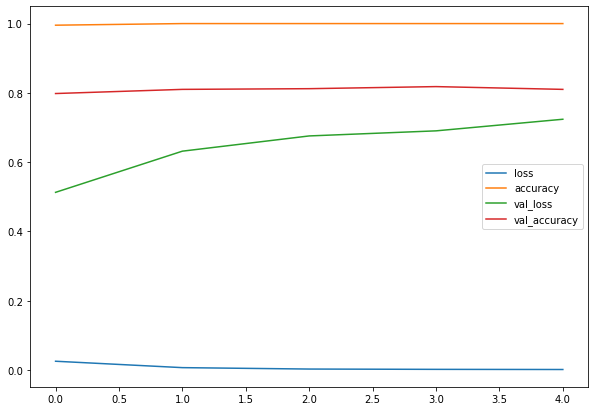

In [16]:
# Ways to evaluate our model

import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [20]:
def plot_loss_curves(history):
    
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

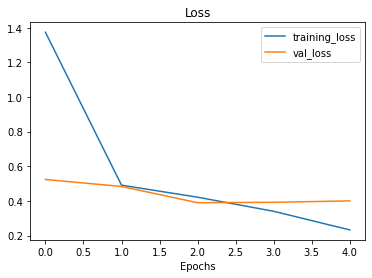

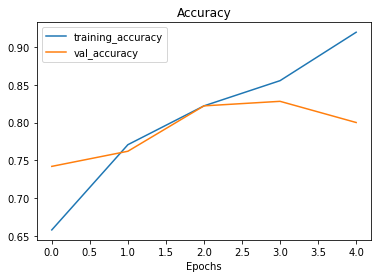

In [21]:
plot_loss_curves(history_4)

In [22]:
model_6 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [23]:
model_6.compile(loss = 'binary_crossentropy',
                optimizer=Adam(),
                metrics = ['accuracy'])

In [24]:
history_6 = model_6.fit(train_data,
            epochs= 5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 16s 332ms/step - loss: 0.5968 - accuracy: 0.6780 - val_loss: 0.4839 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 15s 322ms/step - loss: 0.4693 - accuracy: 0.7953 - val_loss: 0.4048 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 15s 309ms/step - loss: 0.4246 - accuracy: 0.8093 - val_loss: 0.3665 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 15s 312ms/step - loss: 0.4012 - accuracy: 0.8340 - val_loss: 0.3383 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 15s 311ms/step - loss: 0.3820 - accuracy: 0.8407 - val_loss: 0.3398 - val_accuracy: 0.8720


In [25]:
model_6.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6760)             

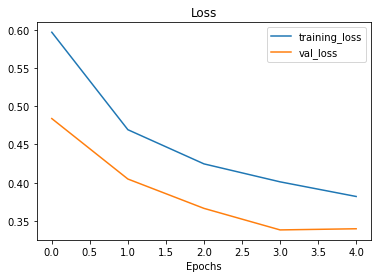

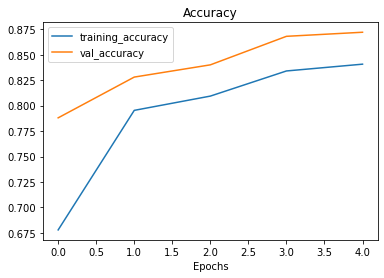

In [26]:
plot_loss_curves(history_6)

In [4]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(1/255.)

In [6]:
train_dir = './datasets/pizza_steak/train'
test_dir = './datasets/pizza_steak/test'

In [17]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [18]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

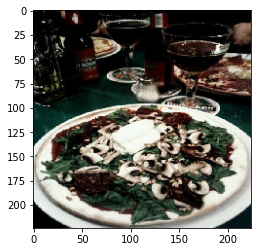

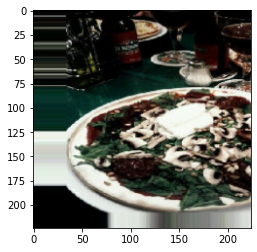

In [19]:
import random

random_number = random.randint(0, 32)
plt.imshow(images[random_number])
plt.figure()
plt.imshow(augmented_images[random_number])

In [20]:
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 543ms/step - loss: 0.8025 - accuracy: 0.4473 - val_loss: 31.4325 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 25s 529ms/step - loss: 0.6843 - accuracy: 0.5727 - val_loss: 28.0600 - val_accuracy: 0.5060
Epoch 3/5
47/47 [==============================] - 26s 544ms/step - loss: 0.6653 - accuracy: 0.6313 - val_loss: 14.9355 - val_accuracy: 0.6960
Epoch 4/5
47/47 [==============================] - 26s 549ms/step - loss: 0.6450 - accuracy: 0.6513 - val_loss: 56.5130 - val_accuracy: 0.5200
Epoch 5/5
47/47 [==============================] - 27s 576ms/step - loss: 0.6005 - accuracy: 0.6913 - val_loss: 82.4405 - val_accuracy: 0.5240
